## Time Serie Linear Modles - TSLM

This analysis explores the relationship between various US expenditure data variables (such as Consumption, Income, Production, Savings, and Unemployment) using statistical and machine learning techniques to assess model fit and performance. The main objectives are:

---

#### 1. Visualize Paired Data and Correlation Matrix

- A **correlation matrix** and **pair plots** are used to explore relationships between the expenditure variables.
- This step helps:
   - Identify potential **collinearity** between variables.
   - Understand the strength and direction of relationships between variables.
   - Provide an **initial understanding** of the data structure.

#### 2. Time Series Linear Model (TSLM) Fit

- A **Time Series Linear Model (TSLM)** is fitted to model **US Consumption** as a function of:
   - Income  
   - Production  
   - Savings  
   - Unemployment  

- The model provides insights into:
   - How each predictor variable contributes to changes in Consumption.
   - The factors driving **consumption expenditure** over time.

#### 3. Model Summary and Visualization

- The **summary of the OLS (Ordinary Least Squares) model** is displayed, including:
   - Coefficients  
   - p-values  
   - R-squared  
   - Other key statistics  

- A plot is generated to compare:
   - **Actual values** of Consumption vs. **Fitted values**.
   - This allows for a **visual assessment** of model fit and performance.


#### 4. Percentage Change in Actual vs. Fitted Values

- A plot is generated to compare the **percentage changes** in:
   - Actual Consumption values  
   - Fitted Consumption values  

- This step evaluates:
   - How well the model captures **trends** and **fluctuations** in Consumption.
   - The model’s ability to track changes in levels over time, focusing on relative movements rather than absolute values.

#### 5. Model Performance Matrix

- A performance matrix is presented with key metrics:
   - **Mean Absolute Error (MAE)**  
   - **Mean Squared Error (MSE)**  
   - **Root Mean Squared Error (RMSE)**  

- These metrics provide a **numerical assessment** of the model's accuracy:
   - Lower values indicate a **better fit** and higher predictive accuracy.

#### 6. Residual Check

- Residual analysis is performed to assess model assumptions:
   - **Distribution plots**: To examine the residuals' spread.  
   - **Q-Q Plot**: To test for **normality** of residuals.  

- These checks ensure that the model’s errors are:
   - Randomly distributed.  
   - Appropriately aligned with the assumptions of the linear regression model.


By following these steps, we gain a comprehensive understanding of the model’s performance, its predictive power, and its ability to explain the variability in **US Consumption**. This analysis ensures robust results for further decision-making and interpretation.



### Package Load

In [50]:
import pandas as pd 
import pandas_datareader as pdr
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np




### Data Fetch and Clean

In [33]:

# Define the date range for your data
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2024, 10, 31)

# Define the FRED series IDs for each measure
fred_series = {
    "Consumption": "PCE",        # Personal Consumption Expenditures
    "Income": "PI",              # Personal Income
    "Production": "INDPRO",      # Industrial Production Index
    "Savings": "PSAVERT",        # Personal Savings Rate
    "Unemployment": "UNRATE"     # Unemployment Rate
}

# Fetch data for each measure and store it in a dictionary
data = {}
for measure, series_id in fred_series.items():
    data[measure] = pdr.get_data_fred(series_id, start=start_date, end=end_date)

# Combine all data into a single DataFrame
df = pd.concat(data, axis=1)

# Display the first few rows of the DataFrame
print(df.head())


           Consumption   Income Production Savings Unemployment
                   PCE       PI     INDPRO PSAVERT       UNRATE
DATE                                                           
2010-01-01     10056.1  12267.7    89.1897     5.6          9.8
2010-02-01     10093.4  12267.6    89.5046     5.3          9.8
2010-03-01     10156.0  12330.9    90.1356     5.3          9.9
2010-04-01     10182.3  12441.8    90.4607     6.0          9.9
2010-05-01     10210.8  12543.7    91.7014     6.4          9.6


### Data Plot Overlook

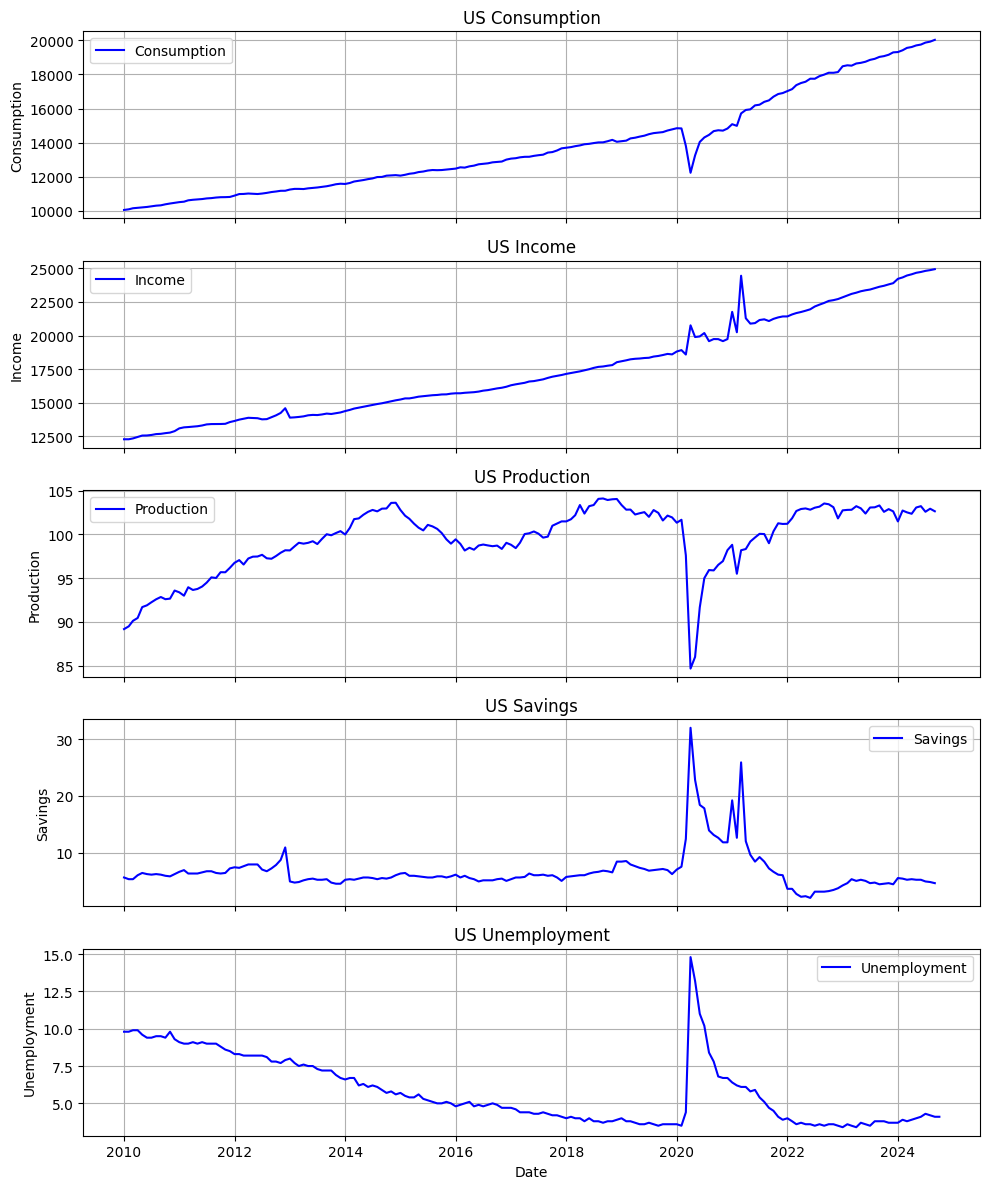

In [34]:

# Create a figure with subplots (5 rows, 1 column)
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 12), sharex=True)

# List of indicators to plot, corresponding to DataFrame columns
indicators = ["Consumption", "Income", "Production", "Savings", "Unemployment"]

# Plot each indicator in a separate subplot
for i, indicator in enumerate(indicators):
    axes[i].plot(df.index, df[indicator], label=indicator, color='blue')
    axes[i].set_title(f"US {indicator}")
    axes[i].set_ylabel(indicator)
    axes[i].grid(True)
    axes[i].legend()

# Set a common x-label
axes[-1].set_xlabel("Date")

# Adjust layout for readability
plt.tight_layout()
plt.show()


### Plot each paired US expenditure data and Correlation Matrix 

<Figure size 500x400 with 0 Axes>

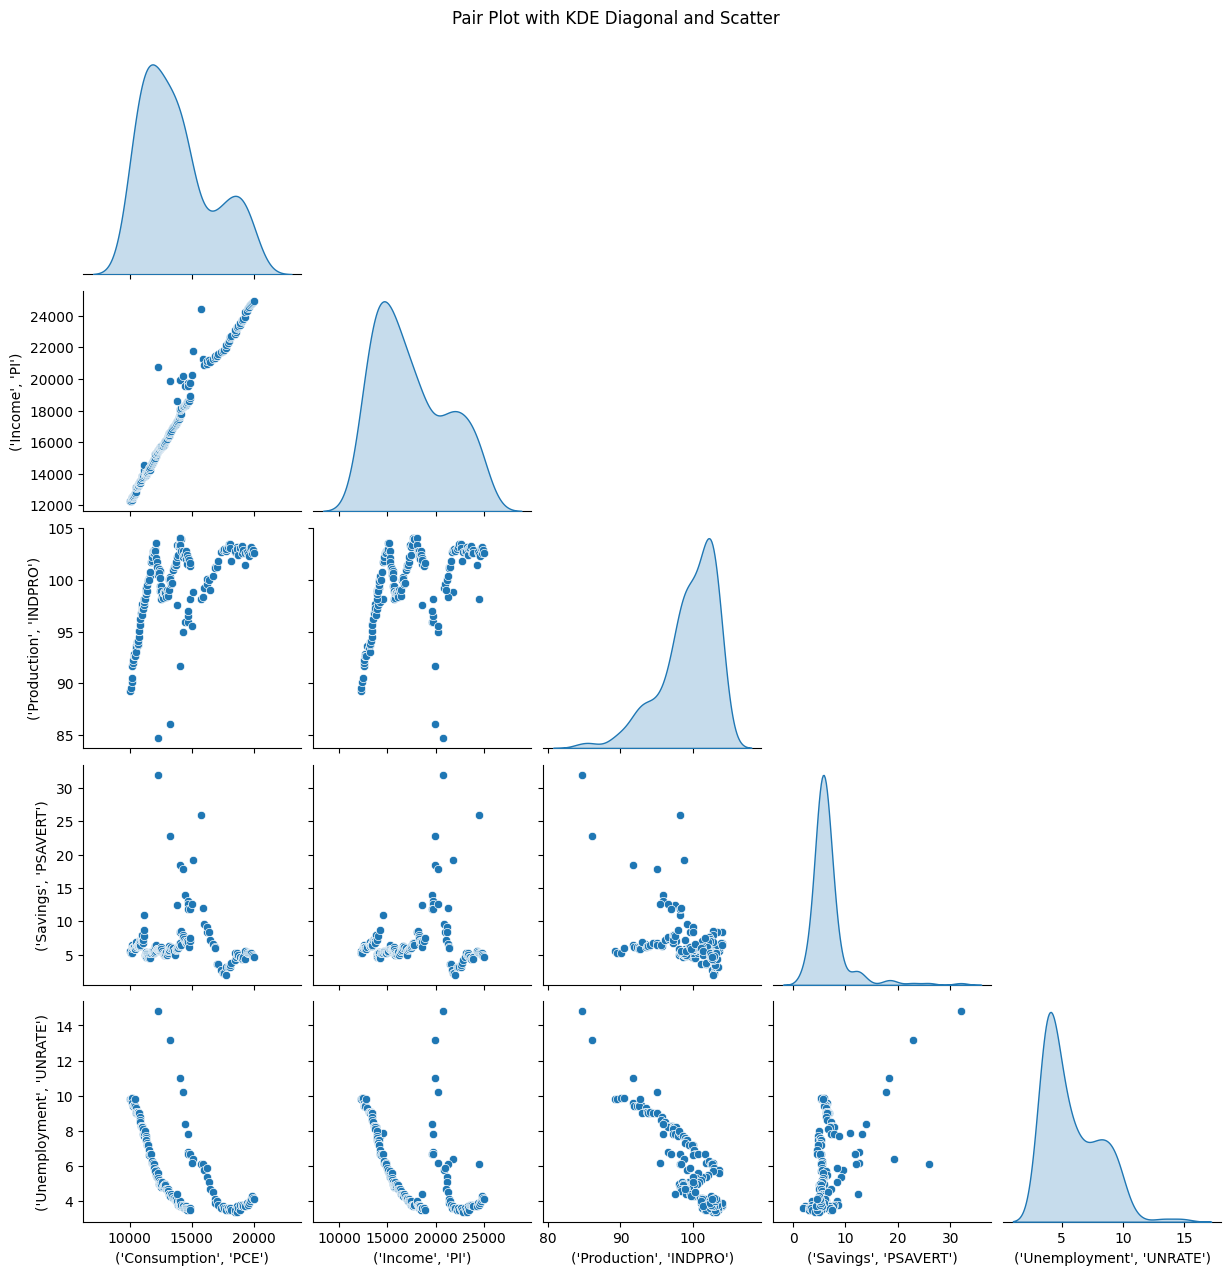

In [35]:
plt.figure(figsize=(5, 4))
sns.pairplot(df, kind="scatter", diag_kind="kde", corner=True)  # 'corner=True' for lower triangle
plt.suptitle("Pair Plot with KDE Diagonal and Scatter", y=1.02)
plt.show()


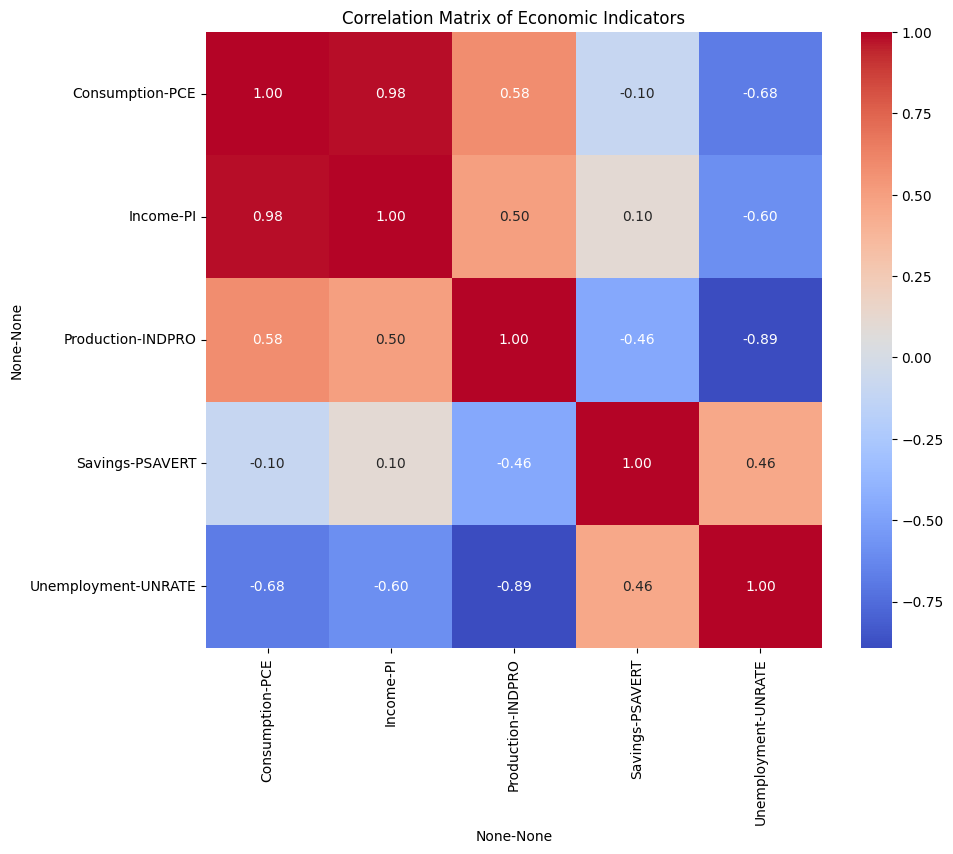

In [36]:

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title("Correlation Matrix of Economic Indicators")
plt.show()

### Time Serie Linear Model Fit 

#### Summary of fitted OLS model

In [37]:

df = df.dropna()

# Define the independent variables (X) and the dependent variable (y)
X = df[['Income', 'Production', 'Unemployment', 'Savings']]
y = df['Consumption']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

# Add the fitted values to the DataFrame
df['Fitted'] = model.fittedvalues

# Calculate percentage change for actual and fitted values
df['Consumption_Pct_Change'] = df['Consumption'].pct_change() * 100  # Percentage change in actual consumption
df['Fitted_Pct_Change'] = df['Fitted'].pct_change() * 100  # Percentage change in fitted consumption



                            OLS Regression Results                            
Dep. Variable:                    PCE   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.745e+04
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          4.36e-240
Time:                        14:17:46   Log-Likelihood:                -1085.0
No. Observations:                 177   AIC:                             2180.
Df Residuals:                     172   BIC:                             2196.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### Plot Actual vs Fitted Consumption Values

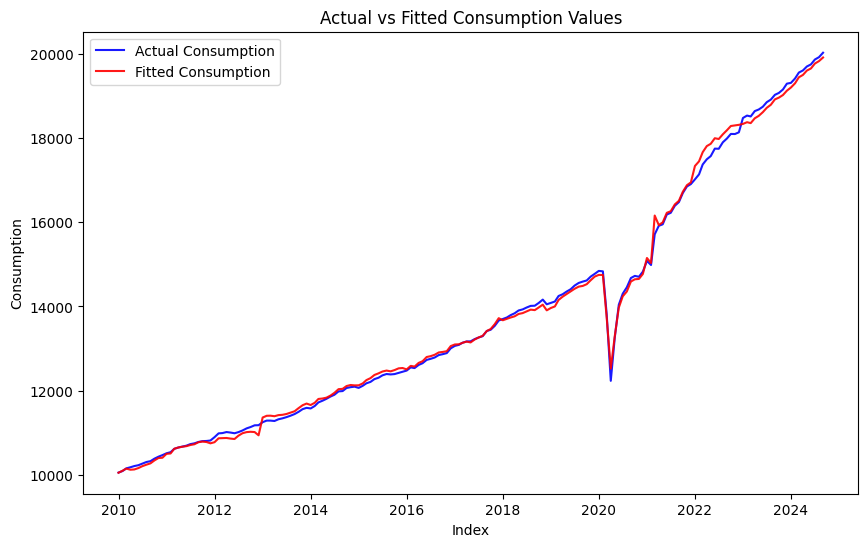

In [45]:
# Plot the actual vs fitted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Consumption'], color="blue", alpha=0.9, label="Actual Consumption")
plt.plot(df.index, df['Fitted'], color="red", alpha=0.9,label="Fitted Consumption")
plt.title("Actual vs Fitted Consumption Values")
plt.xlabel("Index")
plt.ylabel("Consumption")
plt.legend()
plt.show()


#### Plot the percentage change in actual and fitted values

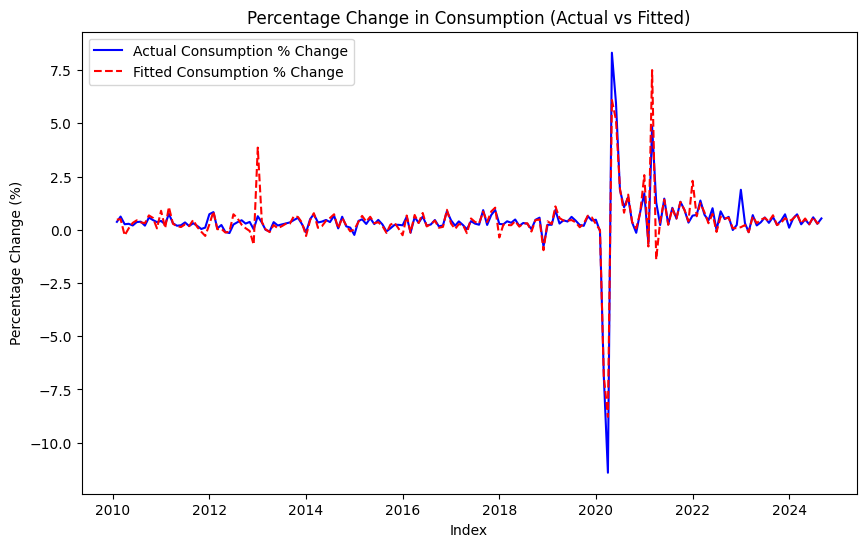

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Consumption_Pct_Change'], color="blue", label="Actual Consumption % Change")
plt.plot(df.index, df['Fitted_Pct_Change'], color="red", linestyle="--", label="Fitted Consumption % Change")
plt.title("Percentage Change in Consumption (Actual vs Fitted)")
plt.xlabel("Index")
plt.ylabel("Percentage Change (%)")
plt.legend()
plt.show()

#### Model Performance Matrix 

In [ ]:
mae = mean_absolute_error(df['Consumption'], df['Fitted'])
mse = mean_squared_error(df['Consumption'], df['Fitted'])
rmse = np.sqrt(mse)

# Print performance metrics
print("\nModel Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Model Performance Metrics:
Mean Absolute Error (MAE): 87.2342
Mean Squared Error (MSE): 12358.8967
Root Mean Squared Error (RMSE): 111.1706


Overall, these metrics suggest that the model has a moderate level of error, with average deviations in predictions of around 87 to 111 units. While the model captures some of the variability in consumption, there may be room for improvement, potentially through adding more explanatory variables, addressing any potential outliers, or using a different modeling approach to reduce the prediction errors further.

#### Residual Checks

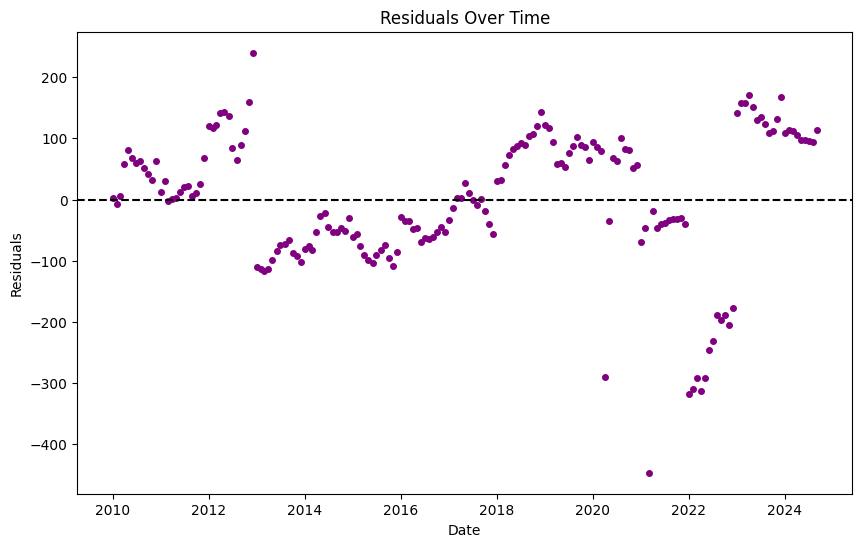

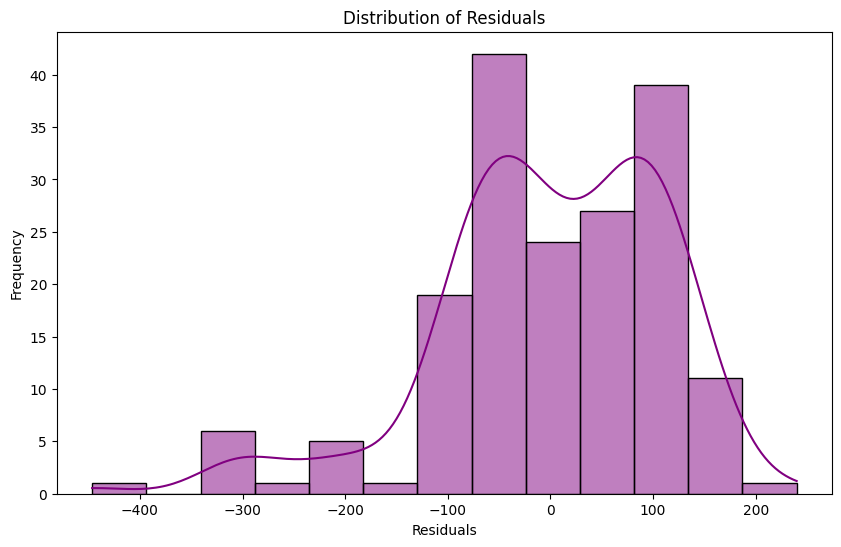

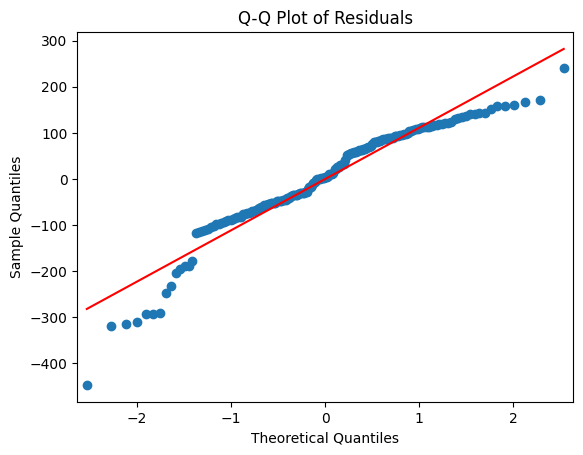

In [53]:
df['Residuals'] = model.resid

# 1. Plot residuals over time
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Residuals'], color="purple", marker="o", linestyle="none", markersize=4)
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals Over Time")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.show()

# 2. Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(df['Residuals'], kde=True, color="purple")
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 3. Q-Q plot of residuals for normality check
sm.qqplot(df['Residuals'], line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()